# MatPlotLib for Python Student Notebook

A compendium of data analysis topics, illustrative examples, best practices, tips and tricks.

## Table of Contents
The organization of this notebook is influenced by these tutorials:

https://matplotlib.org/users/pyplot_tutorial.html


+ [MatPlotLib Introduction](#Intro)
+ [Supporting Modules](#Import)
+ [Basic Plots](#Basic)
+ [Traditional Tutorial](#TraditionalTutorial)
+ [Building From The Ground Up](#Build)
+ [Reference](#Reference)
+ [Appendix](#Appendix)


## MatPlotLib Introduction
<a id=Intro></a>

MatPlotLib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK+. There is also a procedural "pylab" interface based on a state machine (like OpenGL), designed to closely resemble that of MATLAB, though its use is discouraged. SciPy makes use of matplotlib.

The most popular Python interface is "pylab."  matplotlib.pyplot is usually imported and aliased as "plt".

The PyLab interface includes:
+ Methods - Used to assemble the details for a particular plot.
+ Arguments - Data points, usually provided as separate NumPy arrays for each dimension of a series of data points.
+ Parameters and Keyword Arguments - Usually different kinds of plotting "settings" and embelishments.

Most PyLab methods create some kind of plotting object.  For most simple plots, we only need to invoke the method, and don't need to store a reference to the object in a variable name.  For more complex plots (such as the _ax_ axes methods,) we will need to name the object for further manipulation.

The resultant plot is assembled using a number of plotting objects.  These plotting objects are generally independent.  With a few important exceptions, the methods may be invoked in any order. 

I find that, in learning a new human language or a new computing system, there are some important things that are done a certain  way, and it is not fruitful to ask "why?"  Some naming specifics are done by established convention.  With MatPlotLib, the real answer to some questions requires deep understanding of Python object oriented convention and the structure of the MatPlotLib application itself. 



## Import Supporting Modules
<a id=#Import></a>
The following modules are used to support MatPlotLib with NumPy operations.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# All the PyPlot methods:
# print (dir(plt))

## Basic Plot Capabilities
<a id=#Basic></a>
Let's start by building a few basic plots just to show what the language and the output can look like.

There are galleries available elsewhere to show how sophisticated and insightful plots can be.

### Plots with x,y Points
PyLab plt.plot with lists of data coordinates

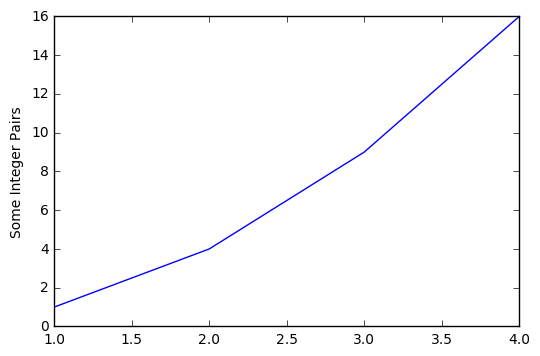

In [2]:
# Start with basic x,y plot of a line connecting pairs of points from lists of x and y values.
# The default format string for data points is ‘b-‘, which is a solid blue line. 
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.ylabel('Some Integer Pairs')
plt.show()

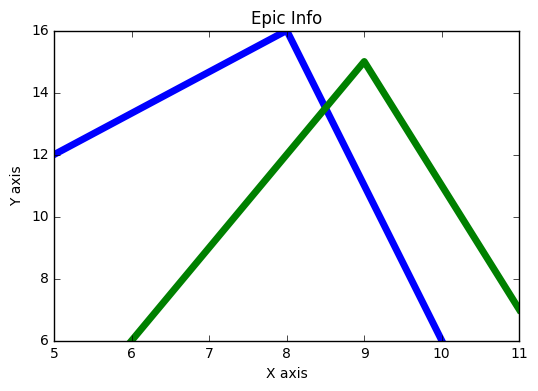

In [3]:
# Another basic x,y plot of a line connecting points defined by separate lists of x and y values.
x_l = [5,8,10]
y_l = [12,16,6]

x2_l = [6,9,11]
y2_l = [6,15,7]

# can plot specifically, after just showing the defaults:
plt.plot(x_l,y_l,linewidth=5)
plt.plot(x2_l,y2_l,linewidth=5)

plt.title('Epic Info')
plt.ylabel('Y axis')
plt.xlabel('X axis')

plt.show()

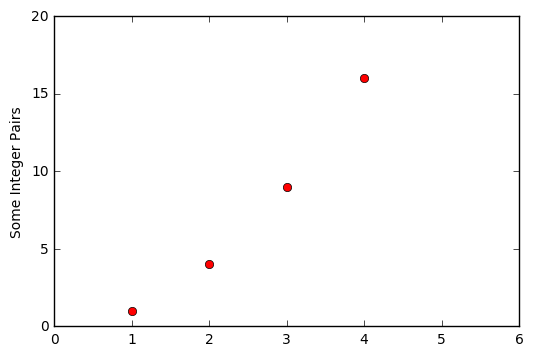

In [4]:
# Basic x,y plot of unconnected pairs of points from lists of x and y values.
# The default format string for data points is ‘b-‘, which is a solid blue line. 
# The axis() command uses a list of [xmin, xmax, ymin, ymax] and specifies the viewport of the axes.
plt.plot([1,2,3,4], [1,4,9,16], 'ro')
plt.ylabel('Some Integer Pairs')
plt.axis([0, 6, 0, 20])
plt.show()

### Plots with f(x) or f(t) like function definitions
plt.plot with functions defined

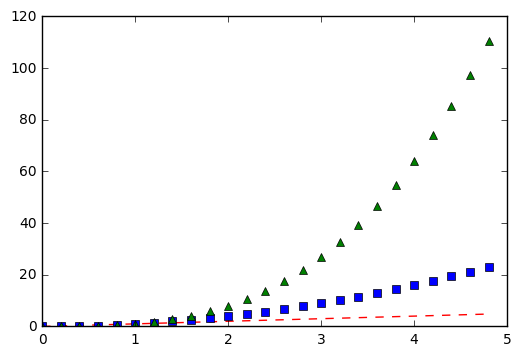

In [5]:
# Using numpy arrays as x (or t) and performing arithmetic operations on x (or t) for multiple y values.
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

### Plots with NumPy arrays defined with f(x) or f(t) data values

PyLab plt.plot with functions defined

<class 'numpy.ndarray'>
float64
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


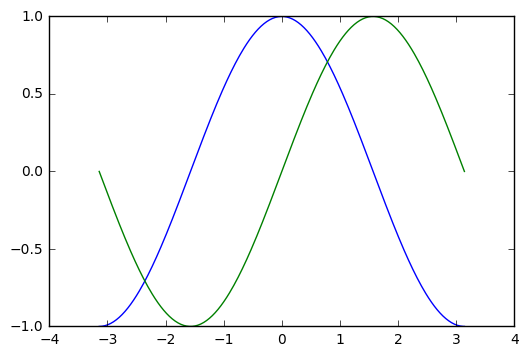

In [6]:
X_a = np.linspace(-np.pi, np.pi, 256,endpoint=True)  # Define and populate array of x (or t) values
print (type(X_a))
print (X_a.dtype)     # Data Type
C_a = np.cos(X_a)     # Define and populate array of y values
print (type(C_a))
S_a = np.sin(X_a)     # Define and populate second array of y values
print (type(S_a))

plt.plot(X_a,C_a)     # Plot by matching array of x values with array of y values
plt.plot(X_a,S_a)     # Plot by matching second array of x values with array of y values

plt.show()

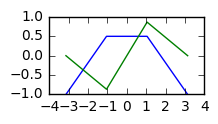

In [7]:
#  Drastically reducing number of points to show that graph is connecting the points with line segments.
X_a = np.linspace(-np.pi, np.pi, 4,endpoint=True)  # Define and populate array of x (or t) values
plt.figure(figsize=(2, 1), dpi=80)
C_a = np.cos(X_a)     # Define and populate array of y values
S_a = np.sin(X_a)     # Define and populate second array of y values

plt.plot(X_a,C_a)     # Plot by matching array of x values with array of y values
plt.plot(X_a,S_a)     # Plot by matching second array of x values with array of y values

plt.show()

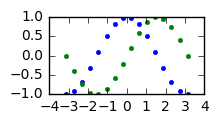

In [8]:
#  Changing point symbol to stop graph from connecting the points with line segments.
X_a = np.linspace(-np.pi, np.pi, 16,endpoint=True)  # Define and populate array of x (or t) values
plt.figure(figsize=(2, 1), dpi=80)
C_a = np.cos(X_a)     # Define and populate array of y values
S_a = np.sin(X_a)     # Define and populate second array of y values

plt.plot(X_a,C_a, '.')     # Plot by matching array of x values with array of y values
plt.plot(X_a,S_a, '.')     # Plot by matching second array of x values with array of y values

plt.show()

## Building From the Ground Up
<a id=#Build></a>
Let's start learning MatPlotLib by building plots from the ground up.  The tiny plots below are small to decrease scrolling fatigue, and because the particular feature of interest can be seen at a distance and is NOT in the details.  You are welcome to tweak parameters and redraw these as big as you like.

To produce a useful plot, we must do four fundamental things:
- Establish the "ground" or canvas, which MatPlotLib calls the *figure*.
- Provide some data points to be plotted.
- Provide some markers and text to provide meaning for the data.
- Direct MatPlotLib to show the resulting plot.


In [1]:
# This array data is used in this and the following Jupyter cells.
x1_a = np.linspace(0.0, 5.0)
x2_a = np.linspace(0.0, 2.0)

y1_a = np.cos(2 * np.pi * x1_a) * np.exp(-x1_a)
y2_a = np.cos(2 * np.pi * x2_a)
y3_a = np.sin(2 * np.pi * x1_a) * np.exp(-x1_a)
y4_a = np.sin(2 * np.pi * x2_a)


plt.figure(figsize=(4, 9), dpi=80)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()


NameError: name 'np' is not defined

### Establishing the Figure "Canvas"
_plt.figure_ establishes the canvas details.  A default figure will be created if this command is not provided.

Colors can be indicated by name, abbreviation, 6 digit hex code.

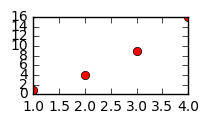

In [12]:
# Create a very small figure of size 2x1 inches, 80 dots per inch
plt.figure(figsize=(2, 1), dpi=80)

# Create a plot of two lists of point coordinates
# (In other words, a list of x coordinates and a list of y coordinates.)
plt.plot([1,2,3,4], [1,4,9,16], 'ro')

# Show result of all the plot objects on screen
plt.show()


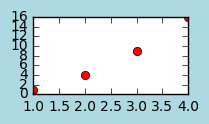

In [14]:
# Create a figure with black border and blue face color.
#    Figure has size 2x1 inches, 80 dots per inch
plt.figure(facecolor = '#aed8e2', edgecolor='black', figsize=(2, 1), dpi=80)

# Create a plot of two lists of point coordinates
plt.plot([1,2,3,4], [1,4,9,16], 'ro')

# Show result of all the plot objects on screen
plt.show()

### Placing Multiple Subplots on the Figure
_plt.subplot_ establishes the shape and placement of a subplot on the figure.  A single default subplot inhabiting the entire figure is used if no subplots are defined.  Complex layouts of large numbers of subplots are possible.

Subplots are addressed by row, column, and indicators.  The third subplot in a quad layout would be 2, 2, 3; representing the third subplot in a two-column two-row layout.

It is vital that subplots **not** overlap.  (Overlapping subplots cancel out.)

The grouping of objects after the _subplot_ method invocation is standard.

Colors can be indicated by name, abbreviation, 6 digit hex code.

https://matplotlib.org/examples/pylab_examples/subplots_demo.html

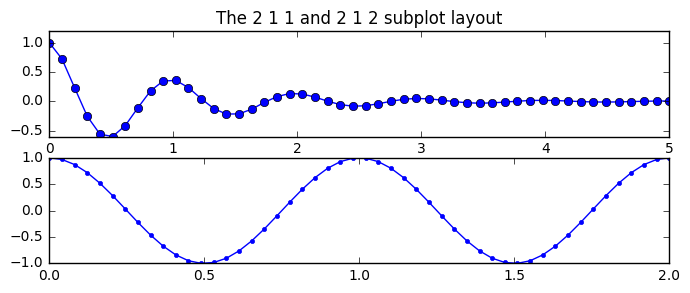

In [5]:
#Create figure with two stacked subplots.

# This array data is used in this and the following Jupyter cells.
x1_a = np.linspace(0.0, 5.0)
x2_a = np.linspace(0.0, 2.0)

y1_a = np.cos(2 * np.pi * x1_a) * np.exp(-x1_a)
y2_a = np.cos(2 * np.pi * x2_a)

plt.figure(figsize=(8, 3), dpi=80)

plt.subplot(2, 1, 1)
plt.plot(x1_a, y1_a, 'o-')
plt.title('The 2 1 1 and 2 1 2 subplot layout')

plt.subplot(2, 1, 2)
plt.plot(x2_a, y2_a, '.-')

plt.show()


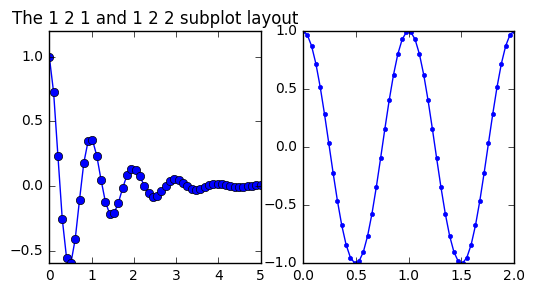

In [39]:
#Create figure with two side-by-side subplots.

plt.figure(figsize=(6, 3), dpi=80)

plt.subplot(1, 2, 1)
plt.plot(x1_a, y1_a, 'o-')
plt.title('The 1 2 1 and 1 2 2 subplot layout')

plt.subplot(1, 2, 2)
plt.plot(x2_a, y2_a, '.-')

plt.show()


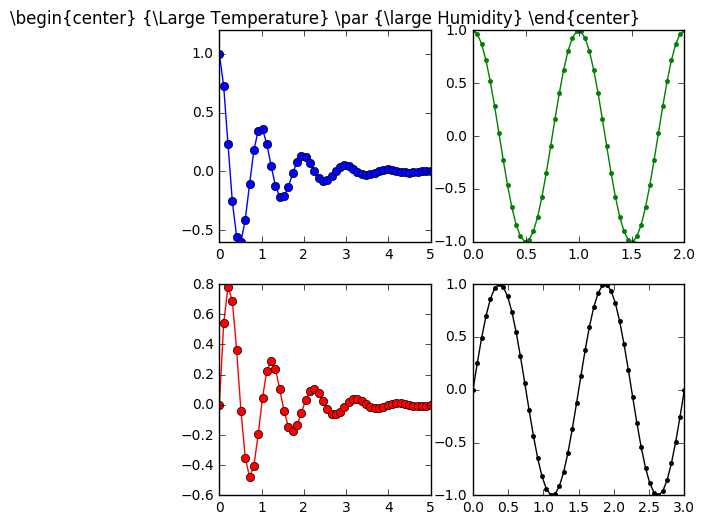

In [46]:
#Create figure with a quad of subplots.

plt.figure(figsize=(6, 6), dpi=80)

# This array data is used in this Jupyter cell.
x1_a = np.linspace(0.0, 5.0)
x2_a = np.linspace(0.0, 2.0)
x3_a = np.linspace(0.0, 5.0)
x4_a = np.linspace(0.0, 3.0)

y1_a = np.cos(2 * np.pi * x1_a) * np.exp(-x1_a)
y2_a = np.cos(2 * np.pi * x2_a)
y3_a = np.sin(2 * np.pi * x1_a) * np.exp(-x1_a)
y4_a = np.sin(2 * np.pi * x2_a)


plt.subplot(2, 2, 1)
plt.plot(x1_a, y1_a, 'o-')
plt.title('The 2 2 1 thru 2 2 4 subplot layout')

plt.subplot(2, 2, 2)
plt.plot(x2_a, y2_a, 'g.-')

plt.subplot(2, 2, 3)
plt.plot(x3_a, y3_a, 'ro-')

plt.subplot(2, 2, 4)
plt.plot(x4_a, y4_a, 'k.-')

plt.show()


### Creating the Title

pl.title

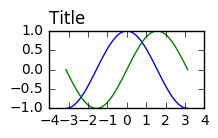

In [55]:
#  Create plot with standard title (but left justified.)
X_a = np.linspace(-np.pi, np.pi, 64,endpoint=True)  # Define and populate array of x (or t) values
plt.figure(figsize=(2, 1), dpi=80)
C_a = np.cos(X_a)     # Define and populate array of y values
S_a = np.sin(X_a)     # Define and populate second array of y values

plt.plot(X_a,C_a)     # Plot by matching array of x values with array of y values
plt.plot(X_a,S_a)     # Plot by matching second array of x values with array of y values

plt.title('Title', loc='Left')

plt.show()

## Traditional Tutorial
<a id=#TraditionalTutorial></a>
Here is the traditional tutorial, avaiable for tweaking settings.

Many Web tutorials are using this example (without accreditation.)  It looks like the author is Nicolas P. Rougier.

### Basic x,y Plot with All Defaults Instantiated
PyLab plt.plot with all defaults instantiated.

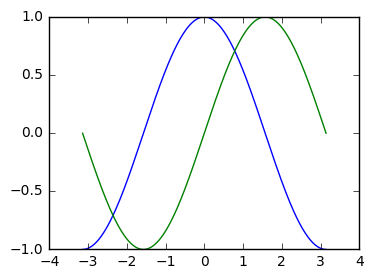

In [51]:
# Create a figure of size 4x3 inches, 80 dots per inch
plt.figure(figsize=(4, 3), dpi=80)

# Create a new subplot from a grid of 1x1
plt.subplot(1, 1, 1)

X_a = np.linspace(-np.pi, np.pi, 256,endpoint=True)
C_a = np.cos(X_a)     # Define and populate array of y values
S_a = np.sin(X_a)    

# Plot cosine with a blue continuous line of width 1 (pixels)
plt.plot(X_a, C_a, color="blue", linewidth=1.0, linestyle="-")

# Plot sine with a green continuous line of width 1 (pixels)
plt.plot(X_a, S_a, color="green", linewidth=1.0, linestyle="-")

# Set x limits
plt.xlim(-4.0, 4.0)

# Set x ticks
plt.xticks(np.linspace(-4, 4, 9, endpoint=True))

# Set y limits
plt.ylim(-1.0, 1.0)

# Set y ticks
plt.yticks(np.linspace(-1, 1, 5, endpoint=True))

# Save figure using 72 dots per inch
# plt.savefig("exercice_2.png", dpi=72)

# Show result on screen
plt.show()

### Figure Size - plt.figure(figsize)
PyLab plt.figure(figsize) sets figure size in plot with all defaults instantiated.

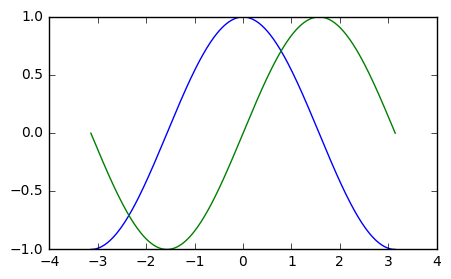

In [52]:
# Modify figure size
# Create a figure of size 5x3 inches, 80 dots per inch
plt.figure(figsize=(5, 3), dpi=80)

# Create a new subplot from a grid of 1x1
plt.subplot(1, 1, 1)

X_a = np.linspace(-np.pi, np.pi, 256,endpoint=True)
C_a = np.cos(X_a)     # Define and populate array of y values
S_a = np.sin(X_a)    

# Plot cosine with a blue continuous line of width 1 (pixels)
plt.plot(X_a, C_a, color="blue", linewidth=1.0, linestyle="-")

# Plot sine with a green continuous line of width 1 (pixels)
plt.plot(X_a, S_a, color="green", linewidth=1.0, linestyle="-")

# Set x limits
plt.xlim(-4.0, 4.0)

# Set x ticks
plt.xticks(np.linspace(-4, 4, 9, endpoint=True))

# Set y limits
plt.ylim(-1.0, 1.0)

# Set y ticks
plt.yticks(np.linspace(-1, 1, 5, endpoint=True))

# Save figure using 72 dots per inch
# plt.savefig("exercice_2.png", dpi=72)

# Show result on screen
plt.show()

### Line Width and Line Color
PyLab plt.plot with keyword arguments *linewidth* and *color*

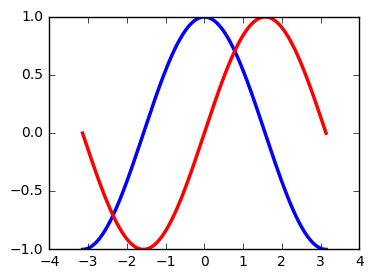

In [53]:
# Modify range limits of the "ground."
# Create a figure of size 4x3 inches, 80 dots per inch
plt.figure(figsize=(4, 3), dpi=80)

# Create a new subplot from a grid of 1x1
plt.subplot(1, 1, 1)

X_a = np.linspace(-np.pi, np.pi, 256,endpoint=True)
C_a = np.cos(X_a)     # Define and populate array of y values
S_a = np.sin(X_a)    

# Plot cosine with a blue continuous line of width 2.5 (pixels)
plt.plot(X_a, C_a, color="blue", linewidth=2.5, linestyle="-")

# Plot sine with a green continuous line of width 2.5 (pixels)
plt.plot(X_a, S_a, color="red", linewidth=2.5, linestyle="-")

# Set x limits
plt.xlim(-4.0, 4.0)

# Set x ticks
plt.xticks(np.linspace(-4, 4, 9, endpoint=True))

# Set y limits
plt.ylim(-1.0, 1.0)

# Set y ticks
plt.yticks(np.linspace(-1, 1, 5, endpoint=True))

# Save figure using 72 dots per inch
# plt.savefig("exercice_2.png", dpi=72)

# Show result on screen
plt.show()

### Data Range Limits - plt.xlim and plt.ylim
PyLab plt.xlim and plt.ylim
Note that the plot range limits are set from a NumPy array method that returns a scalar.

-3.14159265359
-1.0
-0.999981027349
3.14159265359
0.999924110115
0.999981027349


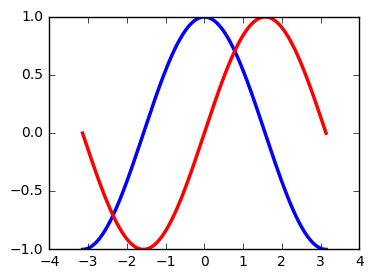

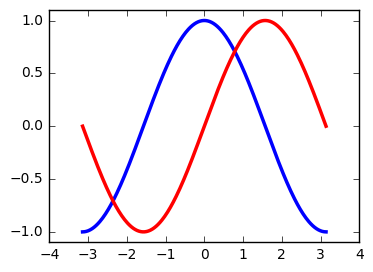

In [56]:
# Modify range limits of the "ground."
# Create a figure of size 4x3 inches, 80 dots per inch
plt.figure(figsize=(4, 3), dpi=80)

# Create a new subplot from a grid of 1x1
plt.subplot(1, 1, 1)

X_a = np.linspace(-np.pi, np.pi, 256,endpoint=True)
C_a = np.cos(X_a)     # Define and populate array of y values
S_a = np.sin(X_a)    

# These NumPy array methods will be needed to set range further below.
print (X_a.min())
print (C_a.min())
print (S_a.min())
print (X_a.max())
print (C_a.max())
print (S_a.max())

# Plot cosine with a blue continuous line of width 2.5 (pixels)
plt.plot(X_a, C_a, color="blue", linewidth=2.5, linestyle="-")

# Plot sine with a green continuous line of width 2.5 (pixels)
plt.plot(X_a, S_a, color="red", linewidth=2.5, linestyle="-")

# Set x limits
plt.xlim(X_a.min()*1.1, X_a.max()*1.1)

# Set x ticks
plt.xticks(np.linspace(-4, 4, 9, endpoint=True))

# Set y limits
plt.ylim(C_a.min()*1.1, C_a.max()*1.1)

# Set y ticks
plt.yticks(np.linspace(-1, 1, 5, endpoint=True))

# Save figure using 72 dots per inch
# plt.savefig("exercice_2.png", dpi=72)

# Show result on screen
plt.show()

### Tick Marks - plt.xticks and plt.yticks
PyLab plt.xticks and plt.yticks

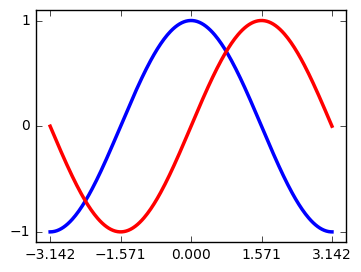

In [57]:
# Modify tick marks.  Note this changes the shape of the plot!
# This sets the points where tick marks will occur, but not how they will be labelled.

# Create a figure of size 4x3 inches, 80 dots per inch
plt.figure(figsize=(4, 3), dpi=80)

# Create a new subplot from a grid of 1x1
plt.subplot(1, 1, 1)

X_a = np.linspace(-np.pi, np.pi, 256,endpoint=True)
C_a = np.cos(X_a)     # Define and populate array of y values
S_a = np.sin(X_a)    

# Plot cosine with a blue continuous line of width 2.5 (pixels)
plt.plot(X_a, C_a, color="blue", linewidth=2.5, linestyle="-")

# Plot sine with a green continuous line of width 2.5 (pixels)
plt.plot(X_a, S_a, color="red", linewidth=2.5, linestyle="-")

# Set x limits
plt.xlim(X_a.min()*1.1, X_a.max()*1.1)

# Set x ticks
plt.xticks( [-np.pi, -np.pi/2, 0, np.pi/2, np.pi])

# Set y limits
plt.ylim(C_a.min()*1.1, C_a.max()*1.1)

# Set y ticks
plt.yticks([-1, 0, +1])


# Save figure using 72 dots per inch
# plt.savefig("exercice_2.png", dpi=72)

# Show result on screen
plt.show()

### Tick Mark Labels - plt.xticks and plt.yticks
PyLab plt.xticks and plt.yticks

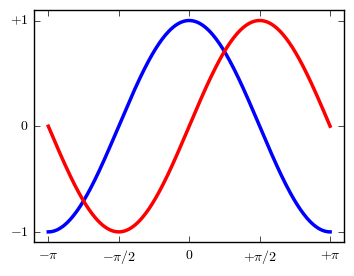

In [58]:
# Modify tick marks.  Note this changes the shape of the plot!
# This sets the points and sets how they will be labelled.
# This supports LaTex syntax.

# Create a figure of size 4x3 inches, 80 dots per inch
plt.figure(figsize=(4, 3), dpi=80)

# Create a new subplot from a grid of 1x1
plt.subplot(1, 1, 1)

X_a = np.linspace(-np.pi, np.pi, 256,endpoint=True)
C_a = np.cos(X_a)     # Define and populate array of y values
S_a = np.sin(X_a)    

# Plot cosine with a blue continuous line of width 2.5 (pixels)
plt.plot(X_a, C_a, color="blue", linewidth=2.5, linestyle="-")

# Plot sine with a green continuous line of width 2.5 (pixels)
plt.plot(X_a, S_a, color="red", linewidth=2.5, linestyle="-")

# Set x limits
plt.xlim(X_a.min()*1.1, X_a.max()*1.1)

# Set x ticks
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
       [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

# Set y limits
plt.ylim(C_a.min()*1.1, C_a.max()*1.1)

# Set y ticks
plt.yticks([-1, 0, +1],
       [r'$-1$', r'$0$', r'$+1$'])


# Save figure using 72 dots per inch
# plt.savefig("exercice_2.png", dpi=72)

# Show result on screen
plt.show()

### Changing and Moving Spines - plt.gca
Spines are the axes and boundary lines.  Here we remove the boundary lines and show the axes.
PyLab plt.gca

<class 'matplotlib.axes._subplots.AxesSubplot'>
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_add_text', '_adjustable', '_agg_filter', '_alpha', '_anchor', '_animated', '_aspect', '_autoscaleXon', '_autoscaleYon', '_axes', '_axes_class', '_axes_locator', '_axisbelow', '_axisbg', '_cachedRenderer', '_clipon', '_clippath', '_connected', '_contains', '_current_image', '_cursorProps', '_frameon', '_gci', '_gen_axes_patch', '_gen_axes_spines', '_get_axis_list', '_get_legend_handles', '_get_lines', '_get_patches_for_fill', '_get_view', '_gid', '_gridOn', '_hold', '_init_axis', '_label', '_left_title', '_make_twin_axes', '_mouseover', '_navigate', '_navigate_mode', '_oid', '_originalPos

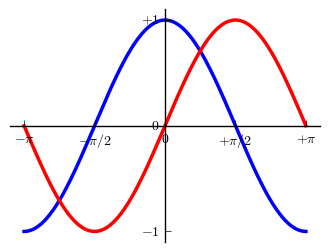

In [59]:
# Move and change spines.

# Create a figure of size 4x3 inches, 80 dots per inch
plt.figure(figsize=(4, 3), dpi=80)

# Create a new subplot from a grid of 1x1
plt.subplot(1, 1, 1)

X_a = np.linspace(-np.pi, np.pi, 256,endpoint=True)
C_a = np.cos(X_a)     # Define and populate array of y values
S_a = np.sin(X_a)    

# Plot cosine with a blue continuous line of width 2.5 (pixels)
plt.plot(X_a, C_a, color="blue", linewidth=2.5, linestyle="-")

# Plot sine with a green continuous line of width 2.5 (pixels)
plt.plot(X_a, S_a, color="red", linewidth=2.5, linestyle="-")

# Set x limits
plt.xlim(X_a.min()*1.1, X_a.max()*1.1)

# Set x ticks
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
       [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

# Set y limits
plt.ylim(C_a.min()*1.1, C_a.max()*1.1)

# Set y ticks
plt.yticks([-1, 0, +1],
       [r'$-1$', r'$0$', r'$+1$'])

# Create spine object from Get Current Axes method
ax = plt.gca()
print (type(ax))
print (dir(ax))
ax.spines['right'].set_color('none')   # Hide right side spine
ax.spines['top'].set_color('none')     # Hide top spine
ax.xaxis.set_ticks_position('bottom')  # Move bottom spine to center
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')    # Move left spine to center
ax.spines['left'].set_position(('data',0))

# Save figure using 72 dots per inch
# plt.savefig("exercice_2.png", dpi=72)

# Show result on screen
plt.show()

### Creating a Legend - plt.legend
Always include a legend.
PyLab plt.legend

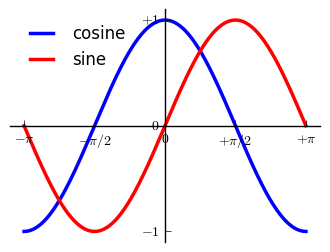

In [60]:
# Create a legend.

# Create a figure of size 4x3 inches, 80 dots per inch
plt.figure(figsize=(4, 3), dpi=80)

# Create a new subplot from a grid of 1x1
plt.subplot(1, 1, 1)

X_a = np.linspace(-np.pi, np.pi, 256,endpoint=True)
C_a = np.cos(X_a)     # Define and populate array of y values
S_a = np.sin(X_a)    

# Plot cosine with a blue continuous line of width 2.5 (pixels)
plt.plot(X_a, C_a, color="blue", linewidth=2.5, linestyle="-", label="cosine")

# Plot sine with a green continuous line of width 2.5 (pixels)
plt.plot(X_a, S_a, color="red", linewidth=2.5, linestyle="-", label="sine")

# Set x limits
plt.xlim(X_a.min()*1.1, X_a.max()*1.1)

# Set x ticks
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
       [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

# Set y limits
plt.ylim(C_a.min()*1.1, C_a.max()*1.1)

# Set y ticks
plt.yticks([-1, 0, +1],
       [r'$-1$', r'$0$', r'$+1$'])

# Create Legend
plt.legend(loc='upper left', frameon=False)

# Create spine object from Get Current Axes method
ax = plt.gca()
ax.spines['right'].set_color('none')   # Hide right side spine
ax.spines['top'].set_color('none')     # Hide top spine
ax.xaxis.set_ticks_position('bottom')  # Move bottom spine to center
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')    # Move left spine to center
ax.spines['left'].set_position(('data',0))

# Save figure using 72 dots per inch
# plt.savefig("exercice_2.png", dpi=72)

# Show result on screen
plt.show()

### Annotating the Plot - plt.annotate
Add additional data points with plt.scatter

Add additional chart lines with plt.plot

Add annotations with plt.annotate

Note that you can mix plot and scatter operations!

PyLab plt.annotate

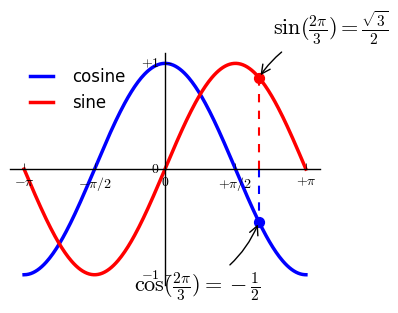

In [61]:
# Annotate the plot.

# Create a figure of size 4x3 inches, 80 dots per inch
plt.figure(figsize=(4, 3), dpi=80)

# Create a new subplot from a grid of 1x1
plt.subplot(1, 1, 1)

X_a = np.linspace(-np.pi, np.pi, 256,endpoint=True)
C_a = np.cos(X_a)     # Define and populate array of y values
S_a = np.sin(X_a)    

t = 2*np.pi/3

# Add upper indicator dot
plt.scatter([t,],[np.sin(t),], 50, color ='red')

# Add upper indicator line
plt.plot([t,t],[0,np.sin(t)], color ='red', linewidth=1.5, linestyle="--")

# Add upper annotation text and arrow
plt.annotate(r'$\sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
             xy=(t, np.sin(t)), xycoords='data',
             xytext=(+10, +30), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))


# Add lower indicator dot
plt.scatter([t,],[np.cos(t),], 50, color ='blue')

# Add lower indicator line
plt.plot([t,t],[0,np.cos(t)], color ='blue', linewidth=1.5, linestyle="--")

# Add lower annotation text and arrow
plt.annotate(r'$\cos(\frac{2\pi}{3})=-\frac{1}{2}$',
             xy=(t, np.cos(t)), xycoords='data',
             xytext=(-90, -50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))


# Plot cosine with a blue continuous line of width 2.5 (pixels)
plt.plot(X_a, C_a, color="blue", linewidth=2.5, linestyle="-", label="cosine")

# Plot sine with a green continuous line of width 2.5 (pixels)
plt.plot(X_a, S_a, color="red", linewidth=2.5, linestyle="-", label="sine")

# Set x limits
plt.xlim(X_a.min()*1.1, X_a.max()*1.1)

# Set x ticks
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
       [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

# Set y limits
plt.ylim(C_a.min()*1.1, C_a.max()*1.1)

# Set y ticks
plt.yticks([-1, 0, +1],
       [r'$-1$', r'$0$', r'$+1$'])

# Create Legend
plt.legend(loc='upper left', frameon=False)

# Create spine object from Get Current Axes method
ax = plt.gca()
ax.spines['right'].set_color('none')   # Hide right side spine
ax.spines['top'].set_color('none')     # Hide top spine
ax.xaxis.set_ticks_position('bottom')  # Move bottom spine to center
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')    # Move left spine to center
ax.spines['left'].set_position(('data',0))

# Save figure using 72 dots per inch
# plt.savefig("exercice_2.png", dpi=72)

# Show result on screen
plt.show()

### Improving Plot Clarity
Change tick label font size and backgrounds for easier reading.

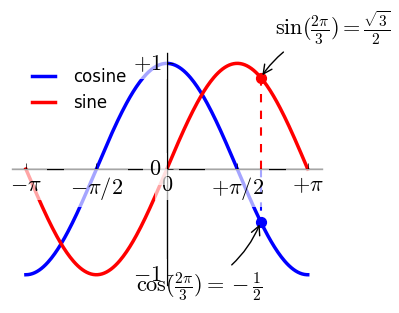

In [62]:
# Improve plot clarity by adjusting tick label font size and background.

# Create a figure of size 4x3 inches, 80 dots per inch
plt.figure(figsize=(4, 3), dpi=80)

# Create a new subplot from a grid of 1x1
plt.subplot(1, 1, 1)

X_a = np.linspace(-np.pi, np.pi, 256,endpoint=True)
C_a = np.cos(X_a)     # Define and populate array of y values
S_a = np.sin(X_a)    

t = 2*np.pi/3

# Add upper indicator dot
plt.scatter([t,],[np.sin(t),], 50, color ='red')

# Add upper indicator line
plt.plot([t,t],[0,np.sin(t)], color ='red', linewidth=1.5, linestyle="--")

# Add upper annotation text and arrow
plt.annotate(r'$\sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
             xy=(t, np.sin(t)), xycoords='data',
             xytext=(+10, +30), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))


# Add lower indicator dot
plt.scatter([t,],[np.cos(t),], 50, color ='blue')

# Add lower indicator line
plt.plot([t,t],[0,np.cos(t)], color ='blue', linewidth=1.5, linestyle="--")

# Add lower annotation text and arrow
plt.annotate(r'$\cos(\frac{2\pi}{3})=-\frac{1}{2}$',
             xy=(t, np.cos(t)), xycoords='data',
             xytext=(-90, -50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))


# Plot cosine with a blue continuous line of width 2.5 (pixels)
plt.plot(X_a, C_a, color="blue", linewidth=2.5, linestyle="-", label="cosine")

# Plot sine with a green continuous line of width 2.5 (pixels)
plt.plot(X_a, S_a, color="red", linewidth=2.5, linestyle="-", label="sine")

# Set x limits
plt.xlim(X_a.min()*1.1, X_a.max()*1.1)

# Set x ticks
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
       [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

# Set y limits
plt.ylim(C_a.min()*1.1, C_a.max()*1.1)

# Set y ticks
plt.yticks([-1, 0, +1],
       [r'$-1$', r'$0$', r'$+1$'])

# Create Legend
plt.legend(loc='upper left', frameon=False)

# Create spine object from Get Current Axes method
ax = plt.gca()
ax.spines['right'].set_color('none')   # Hide right side spine
ax.spines['top'].set_color('none')     # Hide top spine
ax.xaxis.set_ticks_position('bottom')  # Move bottom spine to center
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')    # Move left spine to center
ax.spines['left'].set_position(('data',0))

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(16)
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.65 ))

# Save figure using 72 dots per inch
# plt.savefig("exercice_2.png", dpi=72)

# Show result on screen
plt.show()

## Building From the Ground Up
<a id=#Build></a>
Let's start learning MatPlotLib by building plots from the ground up.

### Populating Arrays



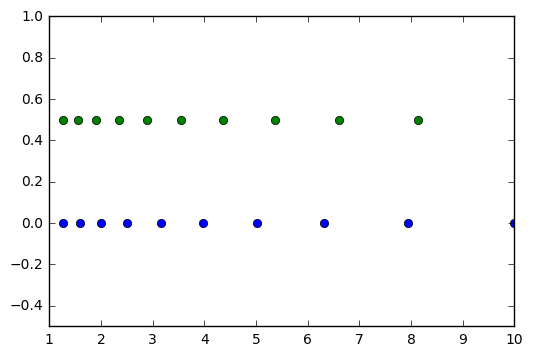

In [63]:
# Use np.logspace to populate with a logarithmically increasing sequence.
N = 10
x1 = np.logspace(0.1, 1, N, endpoint=True)
x2 = np.logspace(0.1, 1, N, endpoint=False)
y = np.zeros(N)
plt.plot(x1, y, 'o')
# [<matplotlib.lines.Line2D object at 0x...>]
plt.plot(x2, y + 0.5, 'o')
# [<matplotlib.lines.Line2D object at 0x...>]
plt.ylim([-0.5, 1])
# (-0.5, 1)
plt.show()

### Array Arithmetic and Simple Math Operations
Most simple array operations are performed on and with arrays on an element-by-element basis (or element-wise.)
Simple math operations fall into a few categories:
+ Array arithmentic performed between corresponding elements of arrays of identical shape.
+ Creation of new (identical shape) target array based on element-wise operation (from scalar) on each element in source array.
+ Creation of new (identical shape) target array based on element-wise operation (from 1x1 array) on each element in source array.
+ Modification of existing array based on element-wise scalar operation on each element in source array.  ("In place")




[ 0 10 20 30 40 50]
[0 1 2 3 4 5]
#-----------------------------------------------------------------
[ 0 11 22 33 44 55]
#-----------------------------------------------------------------
[  0  10  40  90 160 250]
#-----------------------------------------------------------------
[ 0  1  4  9 16 25]
#-----------------------------------------------------------------
[  0.         -54.40211109  91.29452507 -98.80316241  74.51131605
 -26.23748537]
#-----------------------------------------------------------------
[ 0.          3.16227766  4.47213595  5.47722558  6.32455532  7.07106781]
#-----------------------------------------------------------------
[ True  True False False False False]
bool
#-----------------------------------------------------------------
[ 5 15 25 35 45 55]
#-----------------------------------------------------------------
[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
[[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]
[[ 3.  3.  3.  3.]
 [ 3.  3.  

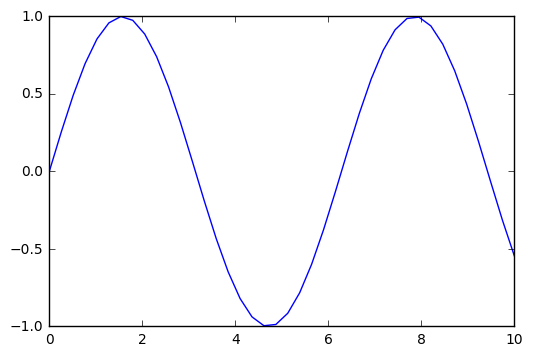

In [64]:
a = np.array( [0, 10, 20,30,40,50] )
b = np.arange( 6 )
print (a)
print (b)
print ("#" + 65*'-')

# Addition of identical shape arrays
c = a + b
print (c)
print ("#" + 65*'-')

# Multipication of identical shape arrays.  NOTE:  This is not matrix multiplication!
c = a * b
print (c)
print ("#" + 65*'-')

# Element-wise exponentiation of  arrays
c = b**2
print (c)
print ("#" + 65*'-')

# Element-wise transcendental math of arrays
c = 100*np.sin(a)
print (c)
print ("#" + 65*'-')

# Alternate element-wise transcendetnal math of arrays, called "Universal Function"
print (np.sqrt(a))
print ("#" + 65*'-')

# Element-wise testing arrays
a<15
c = (a<15)
print (c)
print (c.dtype)
print ("#" + 65*'-')

# One element vector added to true vector is the same as scalar addition to all elements in vector.
d = np.array([5])
c = a + d
print (c)
print ("#" + 65*'-')

# "In Place" operations will modify every element in the same way.  Source array is changed!
d = np.zeros( (3,4) )
print (d)
d +=1
print (d)
d *=3
print (d)
print ("#" + 65*'-')

# Simple plotting of array math using universal functions
%matplotlib inline
x = np.linspace(0,10,40)
sinx = np.sin(x)
plt.plot(x,sinx)





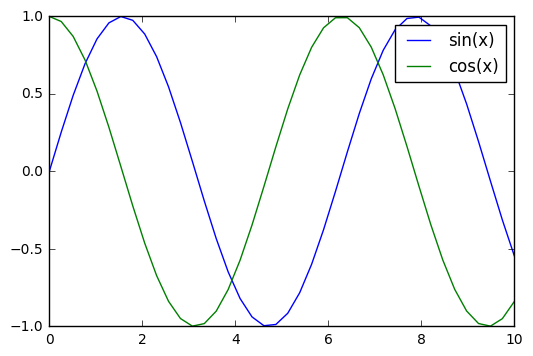

In [65]:
cosx = np.cos(x)
plt.plot(x,sinx)
plt.plot(x,cosx)
plt.legend(['sin(x)','cos(x)'])

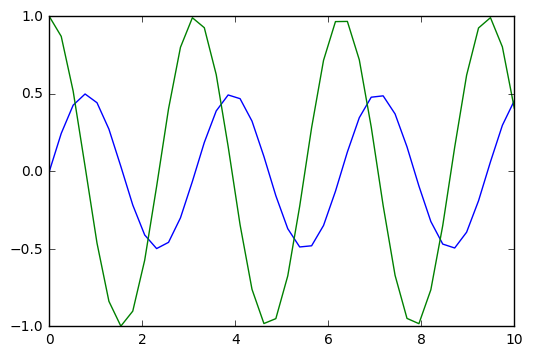

In [66]:
y = sinx * cosx
z = cosx**2 - sinx**2

plt.plot(x,y)
plt.plot(x,z)

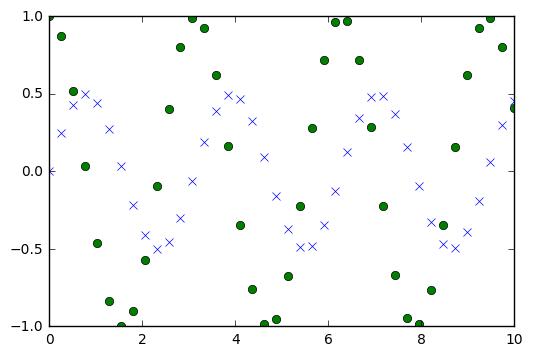

In [67]:
y = sinx * cosx
z = cosx**2 - sinx**2

plt.plot(x,y, 'x')
plt.plot(x,z, 'o')

## MatPlotLib


https://matplotlib.org/gallery.html

http://www.scipy-lectures.org/intro/matplotlib/matplotlib.html

https://www.labri.fr/perso/nrougier/teaching/matplotlib/

http://mple.m-artwork.eu/tutorial

https://matplotlib.org/users/pyplot_tutorial.html

https://jakevdp.github.io/blog/2012/10/07/xkcd-style-plots-in-matplotlib/

!!!!!!!!!!

https://matplotlib.org/faq/usage_faq.html







## Reference
<a id='Reference'></a>

### Major Methods
An alphabetical list of major methods explored above.

matplotlib.pyplot.plot()

matplotlib.pyplot.show()



### Appearance and Performance Methods
An alphabethical list of methods explored above that control appearance and performance.

matplotlib.pyplot.figure

matplotlib.pyplot.legend

matplotlib.pyplot.subplot

matplotlib.pyplot.title

matplotlib.pyplot.xlabel

matplotlib.pyplot.xlim

matplotlib.pyplot.xtics

matplotlib.pyplot.ylabel

matplotlib.pyplot.ylim

matplotlib.pyplot.ytics

(axes).spines

(axes).xaxis

(axes).yaxis


matplotlib.pyplot

### Other Methods
An alphabetical list of additional and miscellaneous methods explored above.

matplotlib.pyplot.gca


matplotlib.pyplot.savefig


## Appendix
<a id="Appendix"></a>

Welcome!  This notebook (and its sisters) was developed for me to practice some Python and data science fundamentals, and for me to explore and notate some interesting tricks, quirks, and lessons learned the hard way.

Because I'm a naval history buff, I have occasionally used US naval ship information as practice data.  US naval ships each have a unique identifying "hull number," making it is easy to build many common Python data structures around ship characteristics.  More information about US "hull numbers" is available from:

http://www.navweaps.com/index_tech/index_ships_list.php

### Tell Me I'm an Idiot!
I welcome coaching, constructive criticism, and insight into more efficient, effective, or Pythonic ways of accomplishing results!

Sincerely,

*Carl Gusler*

Austin, Texas

carl.gusler@gmail.com